# Nasr's Musings on Tennis 1:

# A domain-specific application of unsupervised learning algorithms to tennis statistics

<u>Abstract:</u> This notebook looks at unsupervised learning algorithms to understand relationships between ranking of opponents that won and opponents that lost a tennis match across men's Grand Slam Matches in 2021.

To start with, there are 2 broad types of quantitative analysis methods in sports analytics: descriptive anaytics and predictive analytics. In this notebook, we will be focussing on descriptive analytics, in particular trying to mine patterns between the ATP entry ranking of the winner of a match, and the ATP entry ranking of the loser of a match across all Grand Slam matches in the 2021 ATP season. 

Let's first import all the necessary libraries:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import math
import random
import mglearn
pd.options.mode.chained_assignment = None

Next, let's load in the necessary datasets, which has been sourced from http://tennis-data.co.uk/:

In [3]:
ausopen_2021_atp = pd.read_csv("ausopen_2021_atp.csv",delimiter=',',index_col=0)
frenchopen_2021_atp = pd.read_csv("frenchopen_2021_atp.csv",delimiter=',',index_col=0)
wimbledon_2021_atp = pd.read_csv("wimbledon_2021_atp.csv",delimiter=',',index_col=0)
usopen_2021_atp = pd.read_csv("usopen_2021_atp.csv",delimiter=',',index_col=0)

In [4]:
ausopen_2021_atp.head()

,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,Loser,...,Lsets,Comment,B365W,B365L,PSW,PSL,MaxW,MaxL,AvgW,AvgL
ATP,,,,,,,,,,,,,,,,,,,,,
5,Melbourne,Australian Open,08/02/2021,Grand Slam,Outdoor,Hard,1st Round,5,Raonic M.,Coria F.,...,0.0,Completed,1.01,26.0,1.01,26.84,1.02,34.00,1.01,21.38
5,Melbourne,Australian Open,08/02/2021,Grand Slam,Outdoor,Hard,1st Round,5,Mannarino A.,Novak D.,...,0.0,Completed,1.66,2.2,1.66,2.37,1.83,2.37,1.68,2.19
5,Melbourne,Australian Open,08/02/2021,Grand Slam,Outdoor,Hard,1st Round,5,Ruusuvuori E.,Monfils G.,...,2.0,Completed,1.61,2.3,1.56,2.59,1.78,2.60,1.56,2.42
5,Melbourne,Australian Open,08/02/2021,Grand Slam,Outdoor,Hard,1st Round,5,Moutet C.,Millman J.,...,2.0,Completed,3.00,1.4,2.88,1.48,3.05,1.50,2.78,1.44
5,Melbourne,Australian Open,08/02/2021,Grand Slam,Outdoor,Hard,1st Round,5,Opelka R.,Lu Y.,...,0.0,Completed,1.06,10.0,1.05,14.72,1.07,15.00,1.04,11.40


In [5]:
len(ausopen_2021_atp) 

127

We get 127 which makes sense since in the main draw of a tennis tournament with n players, there will be (n-1) knockout matches. Assuming we are counting from the non-qualifier (main) rounds of a Grand Slam, there are 128 players competing. Next, let's see what our datasets looks like by visualising the top 5 rows:

In [6]:
frenchopen_2021_atp.head()

,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,Loser,...,Lsets,Comment,B365W,B365L,PSW,PSL,MaxW,MaxL,AvgW,AvgL
ATP,,,,,,,,,,,,,,,,,,,,,
30,Paris,French Open,30/05/2021,Grand Slam,Outdoor,Clay,1st Round,5,Fognini F.,Barrere G.,...,0.0,Completed,1.25,4.00,1.27,4.26,1.32,4.26,1.27,3.80
30,Paris,French Open,30/05/2021,Grand Slam,Outdoor,Clay,1st Round,5,Carreno Busta P.,Gombos N.,...,0.0,Completed,1.12,6.00,1.13,7.01,1.19,7.01,1.13,6.09
30,Paris,French Open,30/05/2021,Grand Slam,Outdoor,Clay,1st Round,5,Couacaud E.,Gerasimov E.,...,0.0,Completed,1.66,2.20,1.71,2.27,1.71,2.52,1.61,2.33
30,Paris,French Open,30/05/2021,Grand Slam,Outdoor,Clay,1st Round,5,Laaksonen H.,Hanfmann Y.,...,1.0,Completed,2.10,1.72,2.41,1.64,2.45,1.94,2.21,1.68
30,Paris,French Open,30/05/2021,Grand Slam,Outdoor,Clay,1st Round,5,Bautista Agut R.,Vilella Martinez M.,...,0.0,Completed,1.12,6.00,1.11,8.04,1.14,10.75,1.09,7.67


In [7]:
wimbledon_2021_atp.head()

,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,Loser,...,Lsets,Comment,B365W,B365L,PSW,PSL,MaxW,MaxL,AvgW,AvgL
ATP,,,,,,,,,,,,,,,,,,,,,
36,London,Wimbledon,28/06/2021,Grand Slam,Outdoor,Grass,1st Round,5,Djokovic N.,Draper J.,...,1.0,Completed,1.01,26.00,1.01,33.67,1.01,51.00,1.01,24.52
36,London,Wimbledon,28/06/2021,Grand Slam,Outdoor,Grass,1st Round,5,Tiafoe F.,Tsitsipas S.,...,0.0,Completed,5.50,1.14,5.65,1.18,6.50,1.20,5.50,1.15
36,London,Wimbledon,28/06/2021,Grand Slam,Outdoor,Grass,1st Round,5,Kecmanovic M.,Bagnis F.,...,1.0,Completed,1.10,7.00,1.10,8.81,1.11,9.00,1.09,7.56
36,London,Wimbledon,28/06/2021,Grand Slam,Outdoor,Grass,1st Round,5,Anderson K.,Barrios M.,...,1.0,Completed,1.25,4.00,1.29,4.01,1.29,4.15,1.26,3.86
36,London,Wimbledon,28/06/2021,Grand Slam,Outdoor,Grass,1st Round,5,Kudla D.,Davidovich Fokina A.,...,2.0,Completed,1.90,1.90,2.02,1.88,2.05,1.91,1.96,1.84


In [8]:
usopen_2021_atp.head()

,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,Loser,...,Lsets,Comment,B365W,B365L,PSW,PSL,MaxW,MaxL,AvgW,AvgL
ATP,,,,,,,,,,,,,,,,,,,,,
49,New York,US Open,30/08/2021,Grand Slam,Outdoor,Hard,1st Round,5,Lajovic D.,Paire B.,...,1,Completed,2.50,1.53,2.44,1.63,2.55,1.63,2.38,1.59
49,New York,US Open,30/08/2021,Grand Slam,Outdoor,Hard,1st Round,5,Bagnis F.,Daniel T.,...,0,Completed,2.37,1.57,2.51,1.60,2.51,1.63,2.36,1.59
49,New York,US Open,30/08/2021,Grand Slam,Outdoor,Hard,1st Round,5,Schwartzman D.,Berankis R.,...,0,Completed,1.14,5.50,1.14,6.93,1.18,6.93,1.14,5.77
49,New York,US Open,30/08/2021,Grand Slam,Outdoor,Hard,1st Round,5,Anderson K.,Vesely J.,...,2,Completed,1.30,3.50,1.27,4.20,1.32,4.23,1.26,3.91
49,New York,US Open,30/08/2021,Grand Slam,Outdoor,Hard,1st Round,5,Evans D.,Monteiro T.,...,1,Completed,1.28,3.75,1.29,3.98,1.34,3.98,1.29,3.62


Next, we can use the info() and describe() methods to further understand the datasets we will be working with.

In [9]:
ausopen_2021_atp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127 entries, 5 to 5
Data columns (total 35 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Location    127 non-null    object 
 1   Tournament  127 non-null    object 
 2   Date        127 non-null    object 
 3   Series      127 non-null    object 
 4   Court       127 non-null    object 
 5   Surface     127 non-null    object 
 6   Round       127 non-null    object 
 7   Best of     127 non-null    int64  
 8   Winner      127 non-null    object 
 9   Loser       127 non-null    object 
 10  WRank       127 non-null    int64  
 11  LRank       126 non-null    float64
 12  WPts        127 non-null    int64  
 13  LPts        126 non-null    float64
 14  W1          126 non-null    float64
 15  L1          126 non-null    float64
 16  W2          126 non-null    float64
 17  L2          126 non-null    float64
 18  W3          124 non-null    float64
 19  L3          124 non-null    flo

In [10]:
frenchopen_2021_atp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127 entries, 30 to 30
Data columns (total 35 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Location    127 non-null    object 
 1   Tournament  127 non-null    object 
 2   Date        127 non-null    object 
 3   Series      127 non-null    object 
 4   Court       127 non-null    object 
 5   Surface     127 non-null    object 
 6   Round       127 non-null    object 
 7   Best of     127 non-null    int64  
 8   Winner      127 non-null    object 
 9   Loser       127 non-null    object 
 10  WRank       127 non-null    int64  
 11  LRank       127 non-null    int64  
 12  WPts        127 non-null    int64  
 13  LPts        127 non-null    int64  
 14  W1          126 non-null    float64
 15  L1          126 non-null    float64
 16  W2          125 non-null    float64
 17  L2          125 non-null    float64
 18  W3          125 non-null    float64
 19  L3          125 non-null    f

In [11]:
wimbledon_2021_atp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127 entries, 36 to 36
Data columns (total 35 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Location    127 non-null    object 
 1   Tournament  127 non-null    object 
 2   Date        127 non-null    object 
 3   Series      127 non-null    object 
 4   Court       127 non-null    object 
 5   Surface     127 non-null    object 
 6   Round       127 non-null    object 
 7   Best of     127 non-null    int64  
 8   Winner      127 non-null    object 
 9   Loser       127 non-null    object 
 10  WRank       127 non-null    int64  
 11  LRank       127 non-null    int64  
 12  WPts        127 non-null    int64  
 13  LPts        127 non-null    int64  
 14  W1          126 non-null    float64
 15  L1          126 non-null    float64
 16  W2          126 non-null    float64
 17  L2          126 non-null    float64
 18  W3          124 non-null    float64
 19  L3          124 non-null    f

In [12]:
usopen_2021_atp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127 entries, 49 to 49
Data columns (total 35 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Location    127 non-null    object 
 1   Tournament  127 non-null    object 
 2   Date        127 non-null    object 
 3   Series      127 non-null    object 
 4   Court       127 non-null    object 
 5   Surface     127 non-null    object 
 6   Round       127 non-null    object 
 7   Best of     127 non-null    int64  
 8   Winner      127 non-null    object 
 9   Loser       127 non-null    object 
 10  WRank       127 non-null    int64  
 11  LRank       127 non-null    int64  
 12  WPts        127 non-null    int64  
 13  LPts        127 non-null    int64  
 14  W1          127 non-null    int64  
 15  L1          127 non-null    int64  
 16  W2          127 non-null    int64  
 17  L2          127 non-null    int64  
 18  W3          125 non-null    float64
 19  L3          125 non-null    f

In [13]:
ausopen_2021_atp.describe()

,Best of,WRank,LRank,WPts,LPts,W1,L1,W2,L2,W3,...,Wsets,Lsets,B365W,B365L,PSW,PSL,MaxW,MaxL,AvgW,AvgL
count,127.0,127.000000,126.000000,127.000000,126.000000,126.000000,126.000000,126.000000,126.000000,124.000000,...,126.000000,126.000000,127.000000,127.000000,127.000000,127.000000,127.00000,127.000000,127.000000,127.000000
mean,5.0,51.417323,90.730159,3222.858268,1377.801587,5.761905,4.325397,5.817460,3.714286,5.741935,...,2.944444,0.626984,1.955787,5.721157,1.788583,6.347087,1.93874,7.504488,1.737638,5.479449
std,0.0,57.761337,101.992110,3377.758066,1559.655824,1.248542,1.819140,1.202669,1.892542,1.103365,...,0.291357,0.756139,2.696882,6.041402,1.266524,6.725871,2.00739,9.573281,1.225737,5.148328
min,5.0,1.000000,2.000000,209.000000,10.000000,1.000000,0.000000,1.000000,0.000000,2.000000,...,1.000000,0.000000,1.005000,0.967000,1.010000,1.070000,1.02000,1.070000,1.010000,1.040000
25%,5.0,8.000000,36.250000,878.500000,654.750000,6.000000,3.000000,6.000000,2.000000,6.000000,...,3.000000,0.000000,1.110000,2.000000,1.125000,2.105000,1.13500,2.220000,1.095000,2.050000
50%,5.0,27.000000,72.500000,1785.000000,918.000000,6.000000,4.000000,6.000000,4.000000,6.000000,...,3.000000,0.000000,1.360000,3.200000,1.380000,3.350000,1.40000,3.560000,1.350000,3.220000
75%,5.0,76.000000,111.500000,4429.000000,1544.500000,6.000000,6.000000,6.000000,5.750000,6.000000,...,3.000000,1.000000,1.800000,6.500000,1.820000,7.605000,1.91000,8.700000,1.770000,7.180000
max,5.0,267.000000,1009.000000,12030.000000,9850.000000,7.000000,7.000000,7.000000,7.000000,7.000000,...,3.000000,2.000000,29.000000,29.000000,11.370000,31.600000,21.00000,67.000000,11.430000,23.280000


In [14]:
frenchopen_2021_atp.describe()

,Best of,WRank,LRank,WPts,LPts,W1,L1,W2,L2,W3,...,Wsets,Lsets,B365W,B365L,PSW,PSL,MaxW,MaxL,AvgW,AvgL
count,127.0,127.000000,127.000000,127.000000,127.000000,126.000000,126.000000,125.000000,125.000000,125.000000,...,126.000000,126.000000,126.000000,126.000000,125.000000,125.00000,126.000000,126.000000,126.000000,126.000000
mean,5.0,46.574803,83.464567,3271.551181,1548.039370,5.777778,4.023810,5.536000,3.848000,5.760000,...,2.960317,0.674603,2.375873,4.822413,2.015280,6.11072,2.142302,6.873254,1.937381,5.201190
std,0.0,42.570860,79.696826,3311.288314,1695.687492,1.212527,1.804281,1.451051,1.909467,1.310011,...,0.265354,0.746505,3.718372,4.880503,1.762729,7.04356,1.995746,8.153025,1.580513,5.063084
min,5.0,1.000000,2.000000,393.000000,35.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,1.010000,0.967000,1.010000,1.07000,1.010000,1.070000,1.010000,1.050000
25%,5.0,9.000000,37.500000,950.000000,774.000000,6.000000,3.000000,6.000000,2.000000,6.000000,...,3.000000,0.000000,1.120000,1.900000,1.140000,2.09000,1.162500,2.202500,1.122500,2.052500
50%,5.0,42.000000,73.000000,1500.000000,968.000000,6.000000,4.000000,6.000000,4.000000,6.000000,...,3.000000,1.000000,1.400000,3.000000,1.400000,3.22000,1.455000,3.470000,1.370000,3.145000
75%,5.0,76.000000,105.500000,3958.000000,1604.000000,6.000000,6.000000,6.000000,6.000000,6.000000,...,3.000000,1.000000,1.900000,6.000000,1.830000,6.73000,1.870000,7.232500,1.780000,6.235000
max,5.0,182.000000,680.000000,11313.000000,9793.000000,7.000000,7.000000,7.000000,7.000000,7.000000,...,3.000000,2.000000,29.000000,26.000000,11.200000,32.24000,12.750000,35.000000,10.210000,23.010000


In [15]:
wimbledon_2021_atp.describe()

,Best of,WRank,LRank,WPts,LPts,W1,L1,W2,L2,W3,...,Wsets,Lsets,B365W,B365L,PSW,PSL,MaxW,MaxL,AvgW,AvgL
count,127.000000,127.000000,127.000000,127.000000,127.000000,126.000000,126.000000,126.000000,126.000000,124.000000,...,126.000000,126.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000
mean,4.984252,45.724409,81.070866,2821.732283,1438.039370,5.888889,4.261905,5.634921,4.222222,5.758065,...,2.960317,0.769841,1.715748,4.469134,1.779055,5.083386,1.846929,5.651417,1.729843,4.388740
std,0.177471,39.466819,69.702108,2981.083742,1436.896658,0.981609,1.620758,1.249660,1.770373,1.212207,...,0.265354,0.771105,0.930922,4.330838,1.050945,5.546013,1.149376,7.028848,0.967968,3.999889
min,3.000000,1.000000,2.000000,456.000000,45.000000,2.000000,1.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,1.010000,1.140000,1.010000,1.150000,1.010000,1.160000,1.010000,1.130000
25%,5.000000,12.000000,39.500000,1028.000000,737.000000,6.000000,3.000000,6.000000,3.000000,6.000000,...,3.000000,0.000000,1.200000,2.000000,1.205000,2.090000,1.230000,2.120000,1.190000,2.020000
50%,5.000000,37.000000,72.000000,1660.000000,954.000000,6.000000,4.000000,6.000000,4.000000,6.000000,...,3.000000,1.000000,1.400000,3.000000,1.420000,3.120000,1.450000,3.200000,1.390000,3.000000
75%,5.000000,67.000000,106.500000,2915.000000,1592.500000,6.000000,6.000000,6.000000,6.000000,6.000000,...,3.000000,1.000000,1.800000,4.500000,1.830000,5.130000,1.910000,5.500000,1.805000,4.800000
max,5.000000,156.000000,625.000000,12113.000000,10280.000000,7.000000,7.000000,7.000000,7.000000,7.000000,...,3.000000,2.000000,5.500000,26.000000,6.510000,33.670000,7.240000,51.000000,5.950000,24.520000


In [16]:
usopen_2021_atp.describe()

,Best of,WRank,LRank,WPts,LPts,W1,L1,W2,L2,W3,...,Wsets,Lsets,B365W,B365L,PSW,PSL,MaxW,MaxL,AvgW,AvgL
count,127.0,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,125.000000,...,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000
mean,5.0,60.047244,88.212598,2950.417323,1456.149606,5.574803,4.708661,5.590551,4.188976,5.616000,...,2.944882,0.897638,1.937480,4.794331,2.041417,5.704409,2.124488,6.128898,1.960157,4.795039
std,0.0,76.633519,90.172201,3211.496525,1548.956567,1.488153,1.856393,1.311453,1.841895,1.342746,...,0.290240,0.795170,1.257793,4.992539,1.496078,6.499572,1.593159,7.348726,1.321801,4.741139
min,5.0,1.000000,1.000000,32.000000,32.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,1.000000,0.000000,1.010000,1.080000,1.010000,1.100000,1.020000,1.110000,1.010000,1.090000
25%,5.0,14.000000,39.500000,877.500000,742.000000,6.000000,3.000000,6.000000,3.000000,6.000000,...,3.000000,0.000000,1.130000,1.570000,1.150000,1.640000,1.175000,1.650000,1.140000,1.590000
50%,5.0,46.000000,72.000000,1443.000000,981.000000,6.000000,6.000000,6.000000,4.000000,6.000000,...,3.000000,1.000000,1.440000,2.750000,1.500000,2.810000,1.500000,3.020000,1.420000,2.880000
75%,5.0,86.000000,110.000000,2980.000000,1571.500000,6.000000,6.000000,6.000000,6.000000,6.000000,...,3.000000,2.000000,2.370000,5.750000,2.420000,6.550000,2.545000,6.965000,2.370000,5.860000
max,5.0,716.000000,716.000000,11113.000000,11113.000000,7.000000,7.000000,7.000000,7.000000,7.000000,...,3.000000,2.000000,8.000000,26.000000,8.890000,32.350000,9.900000,34.000000,7.570000,21.070000


Further details on each column can be found on: http://tennis-data.co.uk/notes.txt - the reader is encouraged to read this in detail.

The main question that is aimed to be answered using this notebook is: what type of relation exists between the following:

The difference between the rankings of 2 tennis players facing each other, and the outcome of the match between them.

An answer can be constructed using the WRank and LRank columns in each of the datasets above. 

WRank = ATP Entry ranking of the match winner as of the start of the tournament

LRank = ATP Entry ranking of the match loser as of the start of the tournament

Let's start by making a scatterplot of the WRank and LRank columns for each of the datasets.

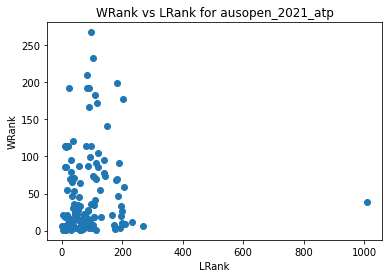

In [18]:
#Plot the WRank on the y axis against the LRank on the x axis for ausopen_2021_atp
plt.title('WRank vs LRank for ausopen_2021_atp')
plt.ylabel('WRank')
plt.xlabel('LRank')
plt.scatter(ausopen_2021_atp['LRank'],ausopen_2021_atp['WRank'])
plt.show()

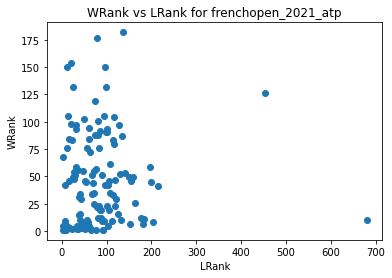

In [19]:
#Plot the WRank on the y axis against the LRank on the x axis for frenchopen_2021_atp
plt.title('WRank vs LRank for frenchopen_2021_atp')
plt.ylabel('WRank')
plt.xlabel('LRank')
plt.scatter(frenchopen_2021_atp['LRank'], frenchopen_2021_atp['WRank'])
plt.show()

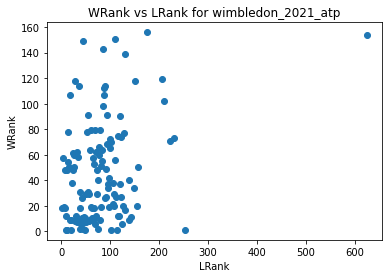

In [20]:
#Plot the WRank on the y axis against the LRank on the x axis for wimbledon_2021_atp
plt.title('WRank vs LRank for wimbledon_2021_atp')
plt.ylabel('WRank')
plt.xlabel('LRank')
plt.scatter(wimbledon_2021_atp['LRank'], wimbledon_2021_atp['WRank'])
plt.show()

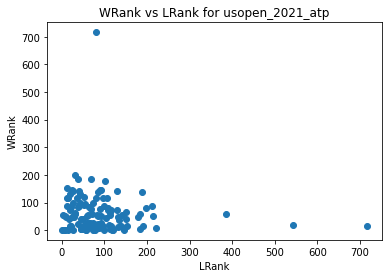

In [21]:
#Plot the WRank on the y axis against the LRank on the x axis for usopen_2021_atp
plt.title('WRank vs LRank for usopen_2021_atp')
plt.ylabel('WRank')
plt.xlabel('LRank')
plt.scatter(usopen_2021_atp['LRank'], usopen_2021_atp['WRank'])
plt.show()

The outliers in the above graphs are there because some wildcards do enter the draws that are outside the top 250, and they may have won all matches in the qualifier rounds leading up to the main draw for the grand slam.
To get a better idea of trends, let's get rid of data for ausopen_2021_atp, frenchopen_2021_atp and wimbledon_2021_atp where LRank > 300, and rid of data for usopen_2021_atp where LRank > 300 and WRank > 300.

In [22]:
ausopen_2021_atp_WRankLRank = ausopen_2021_atp[['WRank', 'LRank']]
ausopen_2021_atp_WRankLRank = ausopen_2021_atp_WRankLRank[ausopen_2021_atp_WRankLRank.LRank <= 300]
frenchopen_2021_atp_WRankLRank = frenchopen_2021_atp[['WRank', 'LRank']]
frenchopen_2021_atp_WRankLRank = frenchopen_2021_atp_WRankLRank[frenchopen_2021_atp_WRankLRank.LRank <= 300]
wimbledon_2021_atp_WRankLRank = wimbledon_2021_atp[['WRank', 'LRank']]
wimbledon_2021_atp_WRankLRank = wimbledon_2021_atp_WRankLRank[wimbledon_2021_atp_WRankLRank.LRank <= 300]
usopen_2021_atp_WRankLRank = usopen_2021_atp[['WRank', 'LRank']]
usopen_2021_atp_WRankLRank = usopen_2021_atp_WRankLRank[usopen_2021_atp_WRankLRank.LRank <= 300]
usopen_2021_atp_WRankLRank = usopen_2021_atp_WRankLRank[usopen_2021_atp_WRankLRank.WRank <= 300]

With the outliers removed, let's make the scatterplots again:

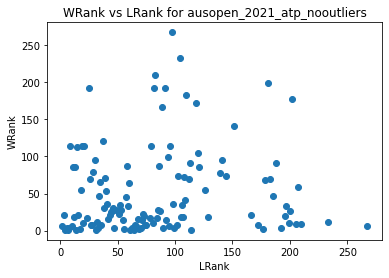

In [23]:
#Plot the WRank on the y axis against the LRank on the x axis for ausopen_2021_atp
plt.title('WRank vs LRank for ausopen_2021_atp_nooutliers')
plt.ylabel('WRank')
plt.xlabel('LRank')
plt.scatter(ausopen_2021_atp_WRankLRank['LRank'],ausopen_2021_atp_WRankLRank['WRank'])
plt.show()

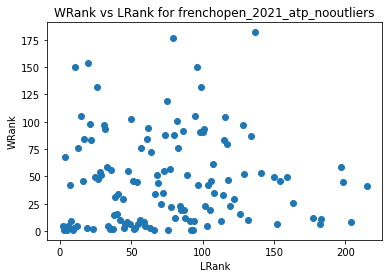

In [24]:
#Plot the WRank on the y axis against the LRank on the x axis for frenchopen_2021_atp
plt.title('WRank vs LRank for frenchopen_2021_atp_nooutliers')
plt.ylabel('WRank')
plt.xlabel('LRank')
plt.scatter(frenchopen_2021_atp_WRankLRank['LRank'], frenchopen_2021_atp_WRankLRank['WRank'])
plt.show()

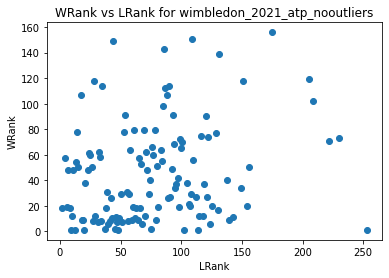

In [25]:
#Plot the WRank on the y axis against the LRank on the x axis for wimbledon_2021_atp
plt.title('WRank vs LRank for wimbledon_2021_atp_nooutliers')
plt.ylabel('WRank')
plt.xlabel('LRank')
plt.scatter(wimbledon_2021_atp_WRankLRank['LRank'], wimbledon_2021_atp_WRankLRank['WRank'])
plt.show()

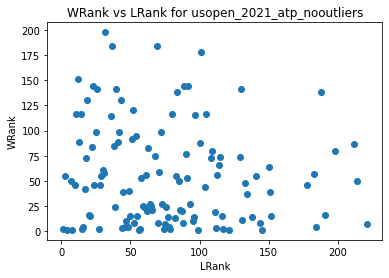

In [26]:
#Plot the WRank on the y axis against the LRank on the x axis for usopen_2021_atp
plt.title('WRank vs LRank for usopen_2021_atp_nooutliers')
plt.ylabel('WRank')
plt.xlabel('LRank')
plt.scatter(usopen_2021_atp_WRankLRank['LRank'], usopen_2021_atp_WRankLRank['WRank'])
plt.show()

Let's apply unsupervised learning algorithms to understand patterns between the ranking of opponents that won, and the ranking of opponents that lost. Before we do that, let's provide a review of unsupervised learning:

### Unsupervised Learning:

The goal in unsupervised learning problems is to discover groups of similar examples in the same data (clustering), or to determine the data distribution within the input space (density estimation). Other unsupervised learning methodologies include simplifying high dimensional data while preserving information content, such as principle component analysis (PCA), t-SNE, UMAP, etc. Imputation and embedding methods also come under unsupervised learning, though we will only look at density estimation and clustering.

#### Methodology 1: k-means clustering

For parsimonious analysis, the number of clusters to construct via the k-means clustering algorithm will be 2.

In [27]:
from sklearn.cluster import KMeans
kmeans_ausopen_2021_atp = KMeans(n_clusters=2, random_state=0).fit(ausopen_2021_atp_WRankLRank)
kmeans_ausopen_2021_atp.labels_

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [28]:
#Finding the cluster centres for ausopen_2021_atp
kmeans_ausopen_2021_atp.cluster_centers_

array([[ 92.02272727, 145.43181818],
       [ 29.35802469,  49.67901235]])

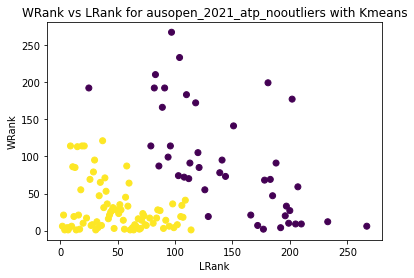

In [29]:
#Plot the WRank on the y axis against the LRank on the x axis for ausopen_2021_atp
plt.title('WRank vs LRank for ausopen_2021_atp_nooutliers with Kmeans')
plt.ylabel('WRank')
plt.xlabel('LRank')
plt.scatter(ausopen_2021_atp_WRankLRank['LRank'], ausopen_2021_atp_WRankLRank['WRank'], c=kmeans_ausopen_2021_atp.labels_)
plt.show()

Next, let's evaluate the silhouette score of the k-means algorithm. Assuming no sampling strategy in our k-means algorithm, the silhouette score computes the silhouette coefficient. This coefficient is the mean intra-cluster distance and the mean nearest-cluster distance for each sample. 

The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar. 

An advantage of using the silhouette score for measuring the quality of cluster formation is that it takes various moments of the data distribution into account i.e. mean, variance, skewness, etc.

In [30]:
from sklearn import metrics
kmeans_ausopen_2021_atp_predict = kmeans_ausopen_2021_atp.predict(ausopen_2021_atp_WRankLRank)
kmeans_ausopen_2021_atp_silhouettescore = metrics.silhouette_score(ausopen_2021_atp_WRankLRank, kmeans_ausopen_2021_atp_predict)
kmeans_ausopen_2021_atp_silhouettescore

0.4672181434232332

Now we do it for the French Open:

In [31]:
kmeans_frenchopen_2021_atp = KMeans(n_clusters=2, random_state=0).fit(frenchopen_2021_atp_WRankLRank)

In [32]:
#Finding the cluster centres for frenchopen_2021_atp
kmeans_frenchopen_2021_atp.cluster_centers_

array([[ 61.02040816, 123.75510204],
       [ 36.69736842,  44.78947368]])

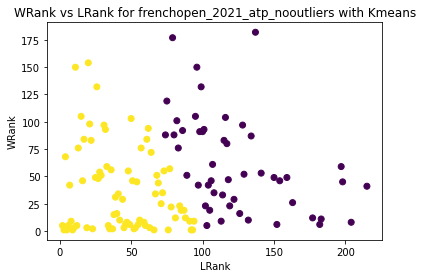

In [33]:
#Plot the WRank on the y axis against the LRank on the x axis for frenchopen_2021_atp
plt.title('WRank vs LRank for frenchopen_2021_atp_nooutliers with Kmeans')
plt.ylabel('WRank')
plt.xlabel('LRank')
plt.scatter(frenchopen_2021_atp_WRankLRank['LRank'], frenchopen_2021_atp_WRankLRank['WRank'], c=kmeans_frenchopen_2021_atp.labels_)
plt.show()

In [34]:
#Evaluate the silhouette score of the k means algorithm.
from sklearn import metrics
kmeans_frenchopen_2021_atp_predict = kmeans_frenchopen_2021_atp.predict(frenchopen_2021_atp_WRankLRank)
kmeans_frenchopen_2021_atp_silhouettescore = metrics.silhouette_score(frenchopen_2021_atp_WRankLRank, kmeans_frenchopen_2021_atp_predict)
kmeans_frenchopen_2021_atp_silhouettescore

0.3711176723068469

Now we do it for Wimbledon:

In [35]:
kmeans_wimbledon_2021_atp = KMeans(n_clusters=2, random_state=0).fit(wimbledon_2021_atp_WRankLRank)

In [36]:
#Finding the cluster centres for wimbledon_2021_atp - add this to the plot below!
kmeans_wimbledon_2021_atp.cluster_centers_

array([[ 35.24657534,  43.38356164],
       [ 58.11320755, 122.71698113]])

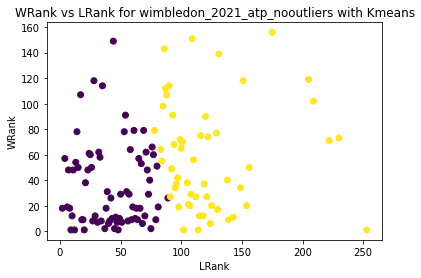

In [37]:
#Plot the WRank on the y axis against the LRank on the x axis for wimbledon_2021_atp
plt.title('WRank vs LRank for wimbledon_2021_atp_nooutliers with Kmeans')
plt.ylabel('WRank')
plt.xlabel('LRank')
plt.scatter(wimbledon_2021_atp_WRankLRank['LRank'], wimbledon_2021_atp_WRankLRank['WRank'], c=kmeans_wimbledon_2021_atp.labels_)
plt.show()

In [38]:
#Evaluate the silhouette score of the k means algorithm.
from sklearn import metrics
kmeans_wimbledon_2021_atp_predict = kmeans_wimbledon_2021_atp.predict(wimbledon_2021_atp_WRankLRank)
kmeans_wimbledon_2021_atp_silhouettescore = metrics.silhouette_score(wimbledon_2021_atp_WRankLRank, kmeans_wimbledon_2021_atp_predict)
kmeans_wimbledon_2021_atp_silhouettescore

0.38296222724457296

Now we do it for US Open:

In [39]:
kmeans_usopen_2021_atp = KMeans(n_clusters=2, random_state=0).fit(usopen_2021_atp_WRankLRank)

In [40]:
#Finding the cluster centres for usopen_2021_atp
kmeans_usopen_2021_atp.cluster_centers_

array([[ 27.25609756,  90.02439024],
       [111.73170732,  51.14634146]])

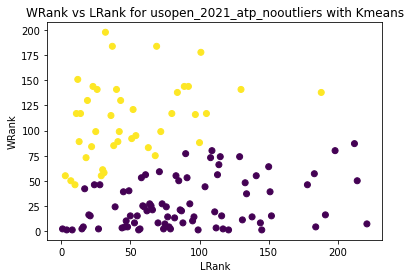

In [41]:
#Plot the WRank on the y axis against the LRank on the x axis for usopen_2021_atp
plt.title('WRank vs LRank for usopen_2021_atp_nooutliers with Kmeans')
plt.ylabel('WRank')
plt.xlabel('LRank')
plt.scatter(usopen_2021_atp_WRankLRank['LRank'], usopen_2021_atp_WRankLRank['WRank'], c=kmeans_usopen_2021_atp.labels_)
plt.show()

In [42]:
#Evaluate the silhouette score of the k means algorithm.
from sklearn import metrics
kmeans_usopen_2021_atp_predict = kmeans_usopen_2021_atp.predict(usopen_2021_atp_WRankLRank)
kmeans_usopen_2021_atp_silhouettescore = metrics.silhouette_score(usopen_2021_atp_WRankLRank, kmeans_usopen_2021_atp_predict)
kmeans_usopen_2021_atp_silhouettescore

0.380033479943525

We can see from the above that cluster formulation for data on the Australian Open is of the highest quality.

K-means clustering is an example of a dimensionality reduction technique, part of cluster analysis which is an unsupervised learning technique. Let's now approximate the cluster boundary created by k-means clustering, by a linear hyperplane in $\mathbb{R}^{2}$. This comes under a general framework of constructing Voronoi diagrams (a set of linear decision boundaries) to make k clusters. 

First, let's assign class labels to the input data:

In [43]:
usopen_2021_atp_WRankLRank_array = usopen_2021_atp_WRankLRank.to_numpy()

In [44]:
usopen_2021_atp_WRankLRank_labels = []
for i in range(len(usopen_2021_atp_WRankLRank_array)):
    if usopen_2021_atp_WRankLRank_array[i,0] <= usopen_2021_atp_WRankLRank_array[i,1]:
        usopen_2021_atp_WRankLRank_labels.append(0)
    else:
        usopen_2021_atp_WRankLRank_labels.append(1)

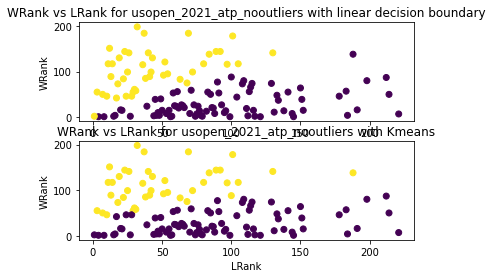

In [45]:
fig, axes = plt.subplots(nrows=2, ncols=1)
plt.subplot(2,1,1)
plt.title('WRank vs LRank for usopen_2021_atp_nooutliers with linear decision boundary')
plt.ylabel('WRank')
plt.xlabel('LRank')
plt.scatter(usopen_2021_atp_WRankLRank['LRank'], usopen_2021_atp_WRankLRank['WRank'], c=usopen_2021_atp_WRankLRank_labels)
plt.subplot(2,1,2)
plt.title('WRank vs LRank for usopen_2021_atp_nooutliers with Kmeans')
plt.ylabel('WRank')
plt.xlabel('LRank')
plt.scatter(usopen_2021_atp_WRankLRank['LRank'], usopen_2021_atp_WRankLRank['WRank'], c=kmeans_usopen_2021_atp.labels_)
plt.show()

<u>Interpretation:</u> In the above 2 plots, we can see that an approximating linear decision boundary for the clusters in the US Open is WRank < LRank. Hence, the cluster regions are roughly created as WRank < LRank and WRank > LRank. This makes sense from a tennis standpoint as matches where the winner had a higher rank than the loser have a similar empirical distribution to matches where the winner had a lower rank than the loser (i.e. matches that were upsets).

Doing the same analysis for other grand slams:

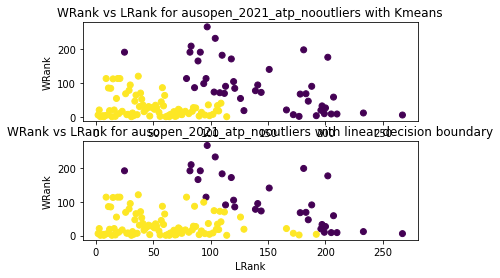

In [46]:
#ausopen_2021_atp
ausopen_2021_atp_WRankLRank_array = ausopen_2021_atp_WRankLRank.to_numpy()
ausopen_2021_atp_WRankLRank_labels = []
for i in range(len(ausopen_2021_atp_WRankLRank_array)):
    if ausopen_2021_atp_WRankLRank_array[i,0] + ausopen_2021_atp_WRankLRank_array[i,1] > 200:
        ausopen_2021_atp_WRankLRank_labels.append(0)
    else:
        ausopen_2021_atp_WRankLRank_labels.append(1)

fig, axes = plt.subplots(nrows=2, ncols=1)
plt.subplot(2,1,1)
plt.title('WRank vs LRank for ausopen_2021_atp_nooutliers with Kmeans')
plt.ylabel('WRank')
plt.xlabel('LRank')
plt.scatter(ausopen_2021_atp_WRankLRank['LRank'], ausopen_2021_atp_WRankLRank['WRank'], c=kmeans_ausopen_2021_atp.labels_)
plt.subplot(2,1,2)
plt.title('WRank vs LRank for ausopen_2021_atp_nooutliers with linear decision boundary')
plt.ylabel('WRank')
plt.xlabel('LRank')
plt.scatter(ausopen_2021_atp_WRankLRank['LRank'], ausopen_2021_atp_WRankLRank['WRank'], c=ausopen_2021_atp_WRankLRank_labels)
plt.show()

<u>Interpretation:</u> The linear decision boundary created classifies data into 2 regions: one region defined by WRank + LRank < 200 and one region defined by WRank + LRank > 200. Note that the region WRank + LRank < 200 $\iff$ WRank < 200 - LRank < 200 $\iff$ LRank < 200 - WRank < 200. 

Nota Bene: When explaining the intuition, the rank of a player will be called the rank (where we know that a rank 3 player is "higher" than a rank 5 player). However, the "magnitude" of the rank 3 player is lower than the magnitude of the rank 5 player. The distinction when referring to a rank or magnitude of a rank will be made in analysis.

The intuition behind this set of inequalities is that the magnitude of ranks of both players won and lost is bounded from above by 200. Hence, in this region, a player who lost or a player who won cannot have a rank lower than 200. As the rank of the loser/winner goes higher up (from 200), the set of possible ranks for the winner/loser respectively increases from only having the highest possible rank (1) to lower ranks. 

Therefore, this region is indicative of matches where ranks of players are relatively close than the region (where WRank + LRank > 200 which implies that the rank of at least 1 player needs to be outside the top 100) showing ranks that either have high difference or low ranked players competing in them. We would expect the types of matches where ranks of players are closer together or players having higher ranks, to have a similar empirical distribution, than the types of matches where ranks of players are farther apart or both players have lower ranks. The above plots support this assertion.

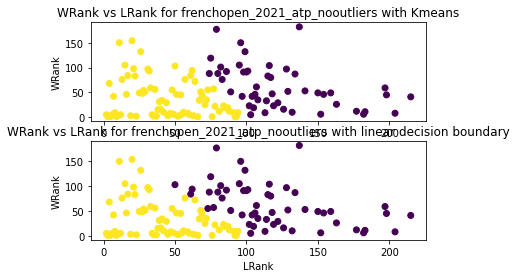

In [47]:
#frenchopen_2021_atp
frenchopen_2021_atp_WRankLRank_array = frenchopen_2021_atp_WRankLRank.to_numpy()
frenchopen_2021_atp_WRankLRank_labels = []
for i in range(len(frenchopen_2021_atp_WRankLRank_array)):
    if frenchopen_2021_atp_WRankLRank_array[i,0] + 2*frenchopen_2021_atp_WRankLRank_array[i,1] > 200:
        frenchopen_2021_atp_WRankLRank_labels.append(0)
    else:
        frenchopen_2021_atp_WRankLRank_labels.append(1)

fig, axes = plt.subplots(nrows=2, ncols=1)
plt.subplot(2,1,1)
plt.title('WRank vs LRank for frenchopen_2021_atp_nooutliers with Kmeans')
plt.ylabel('WRank')
plt.xlabel('LRank')
plt.scatter(frenchopen_2021_atp_WRankLRank['LRank'], frenchopen_2021_atp_WRankLRank['WRank'], c=kmeans_frenchopen_2021_atp.labels_)
plt.subplot(2,1,2)
plt.title('WRank vs LRank for frenchopen_2021_atp_nooutliers with linear decision boundary')
plt.ylabel('WRank')
plt.xlabel('LRank')
plt.scatter(frenchopen_2021_atp_WRankLRank['LRank'], frenchopen_2021_atp_WRankLRank['WRank'], c=frenchopen_2021_atp_WRankLRank_labels)
plt.show()

<u>Interpretation:</u> The approximate linear classifier suggested by 2 means clustering for data on French Open is: WRank + 2(LRank) < 200. The range of values taken by WRank stay the same as for the Australian Open case but the linear classifier pivots inwards to a maximal value of 100 for LRank. Hence, this region is defined by players who lost but had a higher rank than 100. An implication of this is that it allows for the size of the region of points in this region where upsets happen (i.e. WRank > LRank), to be larger. Note that for the Australian Open case, the size (rigorously, this is the 2D integral) of the region of points in the region WRank + LRank < 200 where upsets happen i.e. WRank + LRank < 200 and WRank > LRank, is the same as the size of the region of points in the region where the result is as expected i.e. WRank + LRank < 200 and WRank < LRank. 

Hence, the cluster formed for data in the French Open characterises datapoints where upsets are more common (the loser cannot have a lower rank than 100 but the winner can have a ranking of 100 or lower).

Let's demonstrate the same procedure for Wimbledon data:

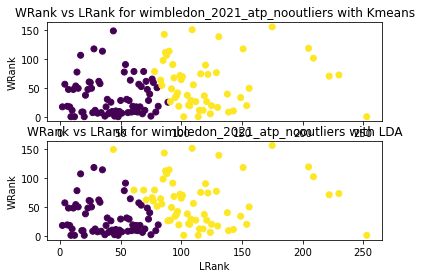

In [50]:
#wimbledon_2021_atp
wimbledon_2021_atp_WRankLRank_array = wimbledon_2021_atp_WRankLRank.to_numpy()
wimbledon_2021_atp_WRankLRank_labels = []
for i in range(len(wimbledon_2021_atp_WRankLRank_array)):
    if wimbledon_2021_atp_WRankLRank_array[i,0] + 2*wimbledon_2021_atp_WRankLRank_array[i,1] <= 200:
        wimbledon_2021_atp_WRankLRank_labels.append(0)
    else:
        wimbledon_2021_atp_WRankLRank_labels.append(1)

fig, axes = plt.subplots(nrows=2, ncols=1)
plt.subplot(2,1,1)
plt.title('WRank vs LRank for wimbledon_2021_atp_nooutliers with Kmeans')
plt.ylabel('WRank')
plt.xlabel('LRank')
plt.scatter(wimbledon_2021_atp_WRankLRank['LRank'], wimbledon_2021_atp_WRankLRank['WRank'], c=kmeans_wimbledon_2021_atp.labels_)
plt.subplot(2,1,2)
plt.title('WRank vs LRank for wimbledon_2021_atp_nooutliers with LDA')
plt.ylabel('WRank')
plt.xlabel('LRank')
plt.scatter(wimbledon_2021_atp_WRankLRank['LRank'], wimbledon_2021_atp_WRankLRank['WRank'], c=wimbledon_2021_atp_WRankLRank_labels)
plt.show()

As seen in the plots, note how the linear decision boundaries are very similar for French Open and Wimbledon. As the rank of the winner goes higher from 200, the possible set of values for the rank of the loser is smaller than the set of values in the decision boundary seen for Australian Open. In particular, the loser is restricted to not having a very low ranking. 

<u>Overall Comments:</u> The linear boundary pivoting inwards or shifting inwards towards the origin in parallel can be seen as a measure of identifying the set to the "left" of this boundary as consisting of more competitive, intense matches. This is because datapoints closer to the origin show higher rank for the winner and loser, and we would expect such tennis matches to be more intense. So relative to the 2021 Australian Open, in the French Open and Wimbledon matches where upsets were more common and the difference in rankings of both players was smaller (defined by the distance of datapoints from the line WRank = LRank), acted as a decision classifier for understanding empirical distributions of match results.

#### Methodology 2: Gaussian Mixture Models (GMM) 

As the name suggests, the Gaussian Mixture Model summarizes a multivariate probability density function with a mixture of Gaussian probability distributions.

First, let's pin down some theoretical differences between GMMs (or GM models) and k means. Gaussian Mixture Models, unlike k means clustering, is a probabilistic algorithm and hence it performs a "soft assignment" of datapoints to clusters by incorporating uncertainty in the assignments. 

GMs is a probabilistic algorithm and since probabilities are assigned to datapoints, the strength of belief that a datapoint belongs to a given cluster is expressed.

It is implemented via the GaussianMixture class and the main configuration to tune is the “n_clusters” hyperparameter used to specify the estimated number of clusters in the data.

The work below tries to address the following question: why do we get different results when we classify by Gaussian Mixture Models as compared to 2 means clustering?

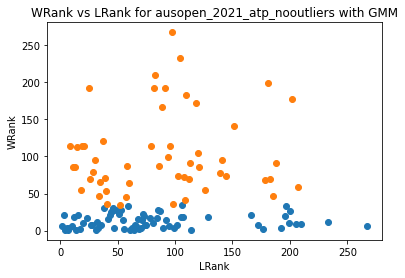

In [67]:
#ausopen_2021_atp
from sklearn.mixture import GaussianMixture
#define the model
model_ausopen_2021 = GaussianMixture(n_components=2, n_init = 40) #kept the number of initialisations high so that the clusters formed stay the same with a large number of re-runs of the code
# fit the model
random.seed(123)
model_ausopen_2021.fit(ausopen_2021_atp_WRankLRank_array)
# assign a cluster to each example
yhat = model_ausopen_2021.predict(ausopen_2021_atp_WRankLRank_array)
# retrieve unique clusters
clusters = np.unique(yhat)
# create scatter plot for samples from each cluster
row_ix = []
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = np.where(yhat == cluster)
	# create scatter of these samples
	plt.scatter(ausopen_2021_atp_WRankLRank_array[row_ix, 1], ausopen_2021_atp_WRankLRank_array[row_ix, 0])
	plt.title('WRank vs LRank for ausopen_2021_atp_nooutliers with GMM')
	plt.ylabel('WRank')
	plt.xlabel('LRank')

# show the plot
plt.show()

Similar to the analysis done for k-means clustering, we are interested in the interpretability of the classification done. Therefore, let's try to estimate a linear decision function separating the 2 classes created by the GM model. 

Since Gaussian Mixture (GM) models are more flexible, so with a covariance matrix the boundaries can be made more ellpitical as opposed to circular boundaries with the k-means clustering algorithm. This is because by default, the GaussianMixture class from sklearn assumes the full covariance structure to be used (the argument in parameter `covariance_type` is `'full'`). Therefore, the aim will be to approximate the ellipsoidal regions constructed by the GM models by rectangular regions in $\mathbb{R}^{2}$:

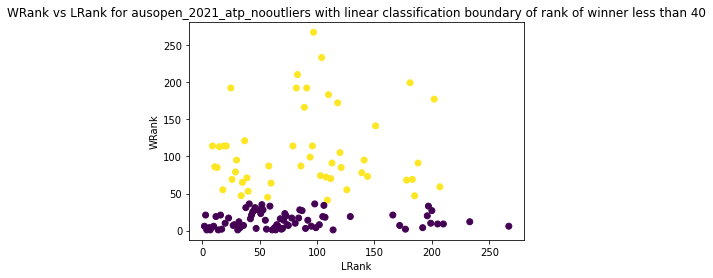

In [50]:
ausopen_2021_atp_WRankLRank_labels_gaussian = []
for i in range(len(ausopen_2021_atp_WRankLRank_array)):
    if ausopen_2021_atp_WRankLRank_array[i,0] <= 40:
        ausopen_2021_atp_WRankLRank_labels_gaussian.append(0)
    else:
        ausopen_2021_atp_WRankLRank_labels_gaussian.append(1)
        
plt.title('WRank vs LRank for ausopen_2021_atp_nooutliers with linear classification boundary of rank of winner less than 40')
plt.ylabel('WRank')
plt.xlabel('LRank')
plt.scatter(ausopen_2021_atp_WRankLRank['LRank'], ausopen_2021_atp_WRankLRank['WRank'], c=ausopen_2021_atp_WRankLRank_labels_gaussian)
plt.show()

The approximate decision boundary here seems to be WRank < 40 with no constraint on values taken by LRank. Hence, the clusters look very different to that suggested by k means. Now, let's assume a spherical covariance type on the GM model (similar to k means clustering):

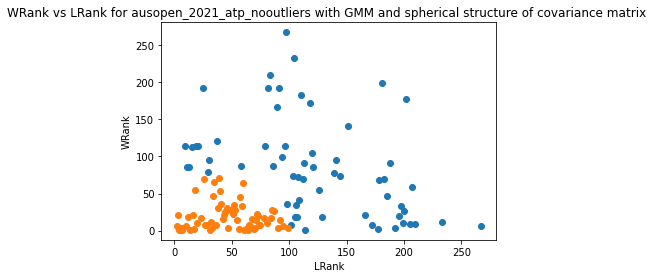

In [75]:
#ausopen_2021_atp with spherical covariance
from sklearn.mixture import GaussianMixture
#define the model
model_ausopen_2021_spherical = GaussianMixture(n_components=2, covariance_type = 'spherical', n_init = 40) #kept the number of initialisations high so that the clusters formed stay the same with a large number of re-runs of the code
# fit the model
random.seed(123)
model_ausopen_2021_spherical.fit(ausopen_2021_atp_WRankLRank_array)
# assign a cluster to each example
yhat_spherical = model_ausopen_2021_spherical.predict(ausopen_2021_atp_WRankLRank_array)
# retrieve unique clusters
clusters_spherical = np.unique(yhat_spherical)
# create scatter plot for samples from each cluster
row_ix_spherical = []
# create scatter plot for samples from each cluster
for cluster_spherical in clusters_spherical:
	# get row indexes for samples with this cluster
	row_ix_spherical = np.where(yhat_spherical == cluster_spherical)
	# create scatter of these samples
	plt.scatter(ausopen_2021_atp_WRankLRank_array[row_ix_spherical, 1], ausopen_2021_atp_WRankLRank_array[row_ix_spherical, 0])
	plt.title('WRank vs LRank for ausopen_2021_atp_nooutliers with GMM and spherical structure of covariance matrix ')
	plt.ylabel('WRank')
	plt.xlabel('LRank')

# show the plot
plt.show()

In [77]:
from sklearn.metrics import silhouette_score
gmm_ausopen_2021_atp_silhouettescore = silhouette_score(ausopen_2021_atp_WRankLRank_array, yhat)
gmm_ausopen_2021_atp_silhouettescore_spherical = silhouette_score(ausopen_2021_atp_WRankLRank_array, yhat_spherical)
[gmm_ausopen_2021_atp_silhouettescore, gmm_ausopen_2021_atp_silhouettescore_spherical]

[0.3101232042055292, 0.37516341286842436]

We can see that by making the covariance structure spherical, we have been able to formulate the classification assignments to be more similar to what the k means clustering algorithm suggested. Secondly, the silhouette score is also higher for GMM with spherical covariances than using the full covariance structure. However, it is smaller than 0.46722, which is the silhouette score for French Open when k means clustering was used. Hence, k means has been the best performing algorithm so far.

Now for French Open:

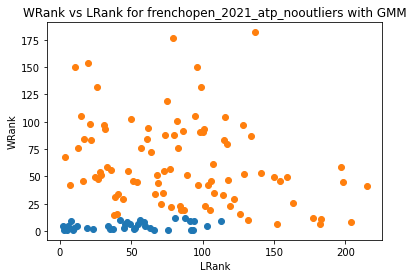

In [78]:
#frenchopen_2021_atp
#define the model
model_frenchopen_2021 = GaussianMixture(n_components=2, n_init = 40) #kept the number of initialisations high so that the clusters formed stay the same with a large number of re-runs of the code
# fit the model
random.seed(123)
model_frenchopen_2021.fit(frenchopen_2021_atp_WRankLRank_array)
# assign a cluster to each example
yhat = model_frenchopen_2021.predict(frenchopen_2021_atp_WRankLRank_array)
# retrieve unique clusters
clusters = np.unique(yhat)
# create scatter plot for samples from each cluster
row_ix = []
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = np.where(yhat == cluster)
	# create scatter of these samples
	plt.scatter(frenchopen_2021_atp_WRankLRank_array[row_ix, 1], frenchopen_2021_atp_WRankLRank_array[row_ix, 0])
	plt.title('WRank vs LRank for frenchopen_2021_atp_nooutliers with GMM')
	plt.ylabel('WRank')
	plt.xlabel('LRank')
# show the plot
plt.show()

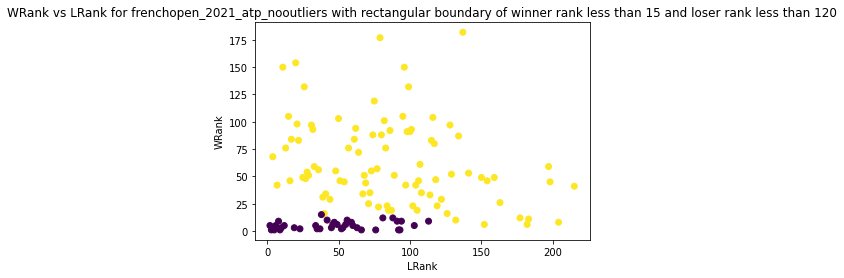

In [79]:
frenchopen_2021_atp_WRankLRank_labels_gaussian = []
for i in range(len(frenchopen_2021_atp_WRankLRank_array)):
    if (frenchopen_2021_atp_WRankLRank_array[i,0] <= 15 and frenchopen_2021_atp_WRankLRank_array[i,1] <= 120):
        frenchopen_2021_atp_WRankLRank_labels_gaussian.append(0)
    else:
        frenchopen_2021_atp_WRankLRank_labels_gaussian.append(1)
        
plt.title('WRank vs LRank for frenchopen_2021_atp_nooutliers with rectangular boundary of winner rank less than 15 and loser rank less than 120')
plt.ylabel('WRank')
plt.xlabel('LRank')
plt.scatter(frenchopen_2021_atp_WRankLRank['LRank'], frenchopen_2021_atp_WRankLRank['WRank'], c=frenchopen_2021_atp_WRankLRank_labels_gaussian)
plt.show()

The same argument can be made about data on the French Open: the clusters are more "ellipsoidal" than spherical (and hence better approximated by a rectangular region). Note that the purpose of approximation by a rectangular or a triangular region (or region separated by linear constraints) is for interpretability of cluster formation from a tennis analytics standpoint.

Intuitively, as seen for Australian and French Open clusters using k means, the maximal magnitude taken by LRank has been reduced by an approximate factor of 2. Unlike seen for Australian and French Open clusters using k means, here the maximal magnitude taken by WRank does not remain the same and is also reduced by an approximate factor of 2. 

Now, let's assume a spherical covariance type on the GM model (similar to k means clustering):

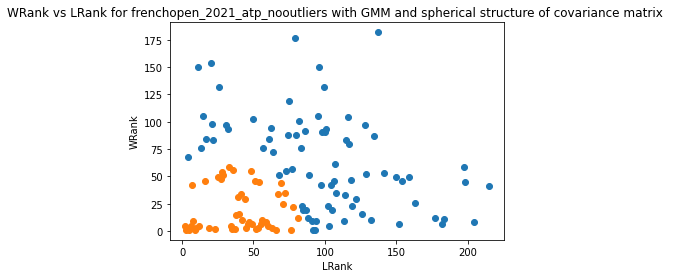

In [80]:
#frenchopen_2021_atp with spherical covariance
from sklearn.mixture import GaussianMixture
#define the model
model_frenchopen_2021_spherical = GaussianMixture(n_components=2, covariance_type = 'spherical', n_init = 40) #kept the number of initialisations high so that the clusters formed stay the same with a large number of re-runs of the code
# fit the model
random.seed(123)
model_frenchopen_2021_spherical.fit(frenchopen_2021_atp_WRankLRank_array)
# assign a cluster to each example
yhat_spherical = model_frenchopen_2021_spherical.predict(frenchopen_2021_atp_WRankLRank_array)
# retrieve unique clusters
clusters_spherical = np.unique(yhat_spherical)
# create scatter plot for samples from each cluster
row_ix_spherical = []
# create scatter plot for samples from each cluster
for cluster_spherical in clusters_spherical:
	# get row indexes for samples with this cluster
	row_ix_spherical = np.where(yhat_spherical == cluster_spherical)
	# create scatter of these samples
	plt.scatter(frenchopen_2021_atp_WRankLRank_array[row_ix_spherical, 1], frenchopen_2021_atp_WRankLRank_array[row_ix_spherical, 0])
	plt.title('WRank vs LRank for frenchopen_2021_atp_nooutliers with GMM and spherical structure of covariance matrix ')
	plt.ylabel('WRank')
	plt.xlabel('LRank')

# show the plot
plt.show()

In [81]:
from sklearn.metrics import silhouette_score
gmm_frenchopen_2021_atp_silhouettescore = silhouette_score(frenchopen_2021_atp_WRankLRank_array, yhat)
gmm_frenchopen_2021_atp_silhouettescore_spherical = silhouette_score(frenchopen_2021_atp_WRankLRank_array, yhat_spherical)
[gmm_frenchopen_2021_atp_silhouettescore, gmm_frenchopen_2021_atp_silhouettescore_spherical]

[0.1973036137638158, 0.28936091177445306]

Again, we can see that by making the covariance structure spherical, we have been able to formulate the classification assignments to be more similar to what the $k$ means clustering algorithm suggested. Secondly, the silhouette score is also higher for GMM with spherical covariances than using the full covariance structure. However, it is smaller than 0.3711, which is the silhouette score for Australian Open when $k$ means clustering was used. Hence, $k$ means has been the best performing algorithm so far.

Now for Wimbledon:

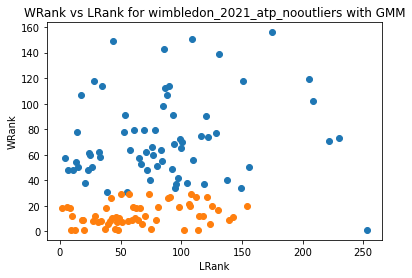

In [84]:
#wimbledon_2021_atp
#define the model
model_wimbledon_2021 = GaussianMixture(n_components=2, n_init = 40) #kept the number of initialisations high so that the clusters formed stay the same with a large number of re-runs of the code
# fit the model
random.seed(123)
model_wimbledon_2021.fit(wimbledon_2021_atp_WRankLRank_array)
# assign a cluster to each example
yhat = model_wimbledon_2021.predict(wimbledon_2021_atp_WRankLRank_array)
# retrieve unique clusters
clusters = np.unique(yhat)
# create scatter plot for samples from each cluster
row_ix = []
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = np.where(yhat == cluster)
	# create scatter of these samples
	plt.scatter(wimbledon_2021_atp_WRankLRank_array[row_ix, 1], wimbledon_2021_atp_WRankLRank_array[row_ix, 0])
	plt.title('WRank vs LRank for wimbledon_2021_atp_nooutliers with GMM')
	plt.ylabel('WRank')
	plt.xlabel('LRank')
# show the plot
plt.show()

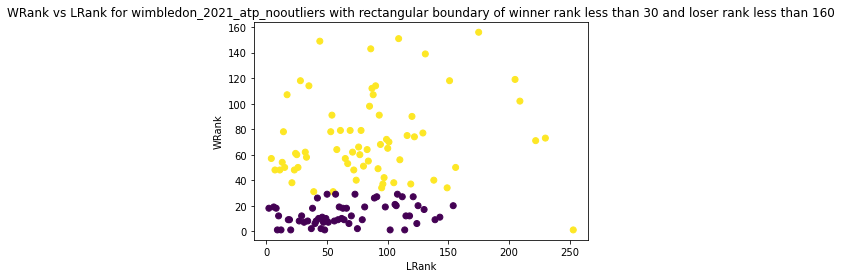

In [85]:
wimbledon_2021_atp_WRankLRank_labels_gaussian = []
for i in range(len(wimbledon_2021_atp_WRankLRank_array)):
    if (wimbledon_2021_atp_WRankLRank_array[i,0] <= 30 and wimbledon_2021_atp_WRankLRank_array[i,1] <= 160):
        wimbledon_2021_atp_WRankLRank_labels_gaussian.append(0)
    else:
        wimbledon_2021_atp_WRankLRank_labels_gaussian.append(1)
        
plt.title('WRank vs LRank for wimbledon_2021_atp_nooutliers with rectangular boundary of winner rank less than 30 and loser rank less than 160')
plt.ylabel('WRank')
plt.xlabel('LRank')
plt.scatter(wimbledon_2021_atp_WRankLRank['LRank'], wimbledon_2021_atp_WRankLRank['WRank'], c=wimbledon_2021_atp_WRankLRank_labels_gaussian)
plt.show()

The same argument can be made about data on Wimbledon: the clusters are more "ellipsoidal" than spherical. 

As seen for clusters for Australian Open for k means, the maximal magnitude taken by LRank has been reduced by a factor of 2. However, due to no data on LRank between (160, 250) for values of WRank less than 40, the previous assertion may be less reliable. Also, unlike the French Open clusters using GMM, the maximal magnitude for WRank has not been restricted as much. However, relative to cluster formation for Australian Open using GMM, the maximal magnitude for WRank does fall from 40 to around 30.

Now, let's assume a spherical covariance type on the GM model (similar to k means clustering):

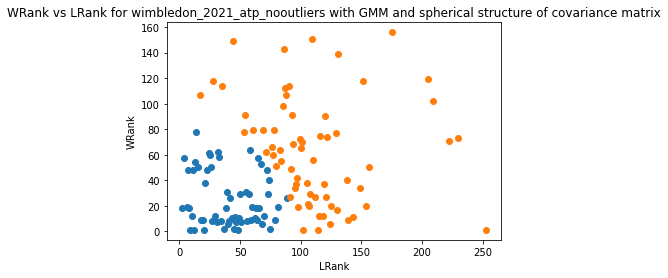

In [86]:
#wimbledon_2021_atp with spherical covariance
from sklearn.mixture import GaussianMixture
#define the model
model_wimbledon_2021_spherical = GaussianMixture(n_components=2, covariance_type = 'spherical', n_init = 40) #kept the number of initialisations high so that the clusters formed stay the same with a large number of re-runs of the code
# fit the model
random.seed(123)
model_wimbledon_2021_spherical.fit(wimbledon_2021_atp_WRankLRank_array)
# assign a cluster to each example
yhat_spherical = model_wimbledon_2021_spherical.predict(wimbledon_2021_atp_WRankLRank_array)
# retrieve unique clusters
clusters_spherical = np.unique(yhat_spherical)
# create scatter plot for samples from each cluster
row_ix_spherical = []
# create scatter plot for samples from each cluster
for cluster_spherical in clusters_spherical:
	# get row indexes for samples with this cluster
	row_ix_spherical = np.where(yhat_spherical == cluster_spherical)
	# create scatter of these samples
	plt.scatter(wimbledon_2021_atp_WRankLRank_array[row_ix_spherical, 1], wimbledon_2021_atp_WRankLRank_array[row_ix_spherical, 0])
	plt.title('WRank vs LRank for wimbledon_2021_atp_nooutliers with GMM and spherical structure of covariance matrix')
	plt.ylabel('WRank')
	plt.xlabel('LRank')

# show the plot
plt.show()

In [87]:
from sklearn.metrics import silhouette_score
gmm_wimbledon_2021_atp_silhouettescore = silhouette_score(wimbledon_2021_atp_WRankLRank_array, yhat)
gmm_wimbledon_2021_atp_silhouettescore_spherical = silhouette_score(wimbledon_2021_atp_WRankLRank_array, yhat_spherical)
[gmm_wimbledon_2021_atp_silhouettescore, gmm_wimbledon_2021_atp_silhouettescore_spherical]

[0.2491365304246089, 0.3650912898412478]

Again, we can see that by making the covariance structure spherical, we have been able to formulate the classification assignments to be more similar to what the k means clustering algorithm suggested. Secondly, the silhouette score is also higher for GMM with spherical covariances than using the full covariance structure. However, it is smaller than 0.383, which is the silhouette score for Wimbledon when k means clustering was used. Hence, k means has been the best performing algorithm so far, but only by a small margin for the case of Wimbledon.

<u>Overall comment about interpretability of GMM cluster formation using full covariance structure:</u> An interesting argument about interpreting results can be made for Australian Open, French Open and Wimbledon. Through the ellipsoidal shape of the cluster closer to the x axis, GMM treats the distribution of matches where the player won, having up to a certain magnitude of rank, to be similar. Thus, it separates matches where top ranked players won, from those matches where the players won but had a lower rank.

Now for US Open:

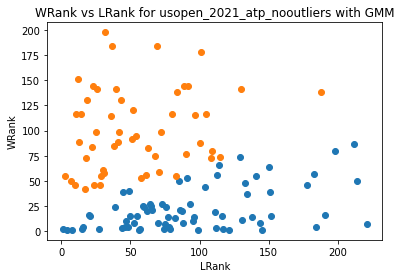

In [88]:
#usopen_2021_atp
#define the model
model_usopen_2021 = GaussianMixture(n_components=2, n_init = 40) #kept the number of initialisations high so that the clusters formed stay the same with a large number of re-runs of the code
# fit the model
random.seed(123)
model_usopen_2021.fit(usopen_2021_atp_WRankLRank_array)
# assign a cluster to each example
yhat = model_usopen_2021.predict(usopen_2021_atp_WRankLRank_array)
# retrieve unique clusters
clusters = np.unique(yhat)
# create scatter plot for samples from each cluster
row_ix = []
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = np.where(yhat == cluster)
	# create scatter of these samples
	plt.scatter(usopen_2021_atp_WRankLRank_array[row_ix, 1], usopen_2021_atp_WRankLRank_array[row_ix, 0])
	plt.title('WRank vs LRank for usopen_2021_atp_nooutliers with GMM')
	plt.ylabel('WRank')
	plt.xlabel('LRank')
# show the plot
plt.show()

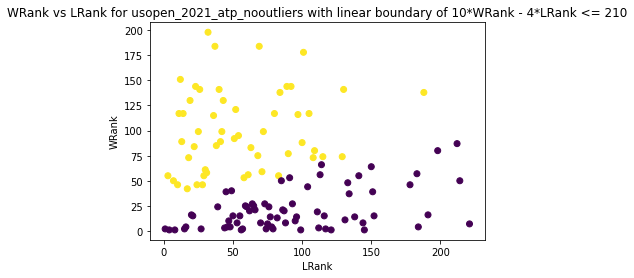

In [89]:
usopen_2021_atp_WRankLRank_labels_gaussian = []
for i in range(len(usopen_2021_atp_WRankLRank_array)):
    if (10*(usopen_2021_atp_WRankLRank_array[i,0]) - 4*(usopen_2021_atp_WRankLRank_array[i,1]) <= 210):
        usopen_2021_atp_WRankLRank_labels_gaussian.append(0)
    else:
        usopen_2021_atp_WRankLRank_labels_gaussian.append(1)
        
plt.title('WRank vs LRank for usopen_2021_atp_nooutliers with linear boundary of 10*WRank - 4*LRank <= 210')
plt.ylabel('WRank')
plt.xlabel('LRank')
plt.scatter(usopen_2021_atp_WRankLRank['LRank'], usopen_2021_atp_WRankLRank['WRank'], c=usopen_2021_atp_WRankLRank_labels_gaussian)
plt.show()

In the case of k means clustering, the linear classifier was approximately a 45 degree line through the origin. However, while with GMMs the classifying boundary has WRank increasing in magnitude as the magnitude of LRank increases (i.e. positive gradient), the steepness of the gradient is reduced by an approximate factor of 2. Plus, now the WRank-intercept of the graph is positive. Therefore, GMM does not solely drive classification by whether a match is an upset (WRank > LRank) or an expected result (WRank < LRank). In the region where WRank < LRank (the cluster with purple points i.e. expected results), GMM assumes that this empirical distribution of results should also include some upsets for small magnitudal values of WRank and LRank. 

From a tennis analytics standpoint, this can be argued from a certain standpoint, namely that upsets when top seeds are facing each other at the US Open tend to be somewhat as probable as expected results when lower seeds play against each other. 

Now, let's assume a diagonal covariance type on the GM model. Note that unlike for the other cases, it would not be suitable to assume spherical nature of the covariance as the linear classifier is a positive-sloped line and therefore we would expect a much smaller value for the silhouette score.  

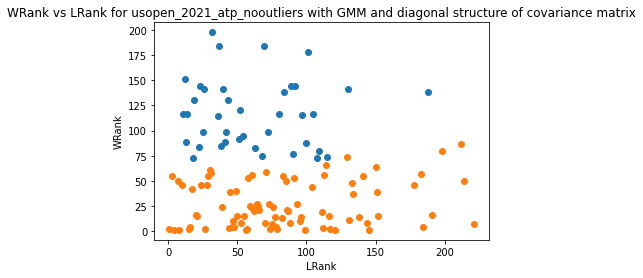

In [94]:
#usopen_2021_atp with spherical covariance
from sklearn.mixture import GaussianMixture
#define the model
model_usopen_2021_diag = GaussianMixture(n_components=2, covariance_type = 'diag', n_init = 40) #kept the number of initialisations high so that the clusters formed stay the same with a large number of re-runs of the code
# fit the model
random.seed(123)
model_usopen_2021_diag.fit(usopen_2021_atp_WRankLRank_array)
# assign a cluster to each example
yhat_diag = model_usopen_2021_diag.predict(usopen_2021_atp_WRankLRank_array)
# retrieve unique clusters
clusters_diag = np.unique(yhat_diag)
# create scatter plot for samples from each cluster
row_ix_diag = []
# create scatter plot for samples from each cluster
for cluster_diag in clusters_diag:
	# get row indexes for samples with this cluster
	row_ix_diag = np.where(yhat_diag == cluster_diag)
	# create scatter of these samples
	plt.scatter(usopen_2021_atp_WRankLRank_array[row_ix_diag, 1], usopen_2021_atp_WRankLRank_array[row_ix_diag, 0])
	plt.title('WRank vs LRank for usopen_2021_atp_nooutliers with GMM and diagonal structure of covariance matrix')
	plt.ylabel('WRank')
	plt.xlabel('LRank')

# show the plot
plt.show()

In [95]:
from sklearn.metrics import silhouette_score
gmm_usopen_2021_atp_silhouettescore = silhouette_score(usopen_2021_atp_WRankLRank_array, yhat)
gmm_usopen_2021_atp_silhouettescore_diag = silhouette_score(usopen_2021_atp_WRankLRank_array, yhat_diag)
[gmm_usopen_2021_atp_silhouettescore, gmm_usopen_2021_atp_silhouettescore_diag]

[0.3523659662716059, 0.37598457978077365]

Indeed, using a diagonal covariance structure enabled an increase in the silhouette score! In fact, it is the same as the silhouette score for US Open when we use k means clustering (i.e. 0.38 to 2 decimal places). 

So far, we have seen k means performing relatively better than GMMs with respect to the quality of clusters created. However, the analysis done is not exhaustive and the reader is encouraged to extend it further - such as by using other covariance structures, random initialisation of responsibilities in the GMM model instead of k means based initialisation, etc.

#### Methodology 3: Agglomerative Clustering 

Agglomerate clustering refers to a collection of clustering algorithms that all build upon the same principles: the algorithm starts by declaring each point its own cluster, and then merges the two most similar clusters until some stopping criterion is satisfied. The stopping criterion is implemented in `scikit-learn` is the number of clusters, so similar clusters are merged until only the specified number of clusters are left. There are several linkage criteria that specify how exactly the "most similar cluster" is measured. This measure is always defined between two existing clusters. 

The following four choices are implemented in `scikit-learn` [5]:

`ward`: The default choice, `ward` picks the two clusters to merge such that the variance within all clusters increases the least. This often leads to clusters that are relatively equally sized. `ward` works on most datasets.

`average`: `average` linkage merges the two clusters to merge that have the smallest average distance between all their points.

`complete`: `complete` linkage (also known as maximum linkage) merges the two clusters that have the smallest average distance between all their points.

`single`: `single` uses the minimum of the distances between all observations of the two sets.

The purpose of performing agglomerative clustering is to show the process of parameter selection for getting higher silhouette scores than seen for k means and GMM. However, this will come at the cost of interpretability of the model from a tennis analytics standpoint, and this limitation is explained.

Text(0, 0.5, 'WRank')

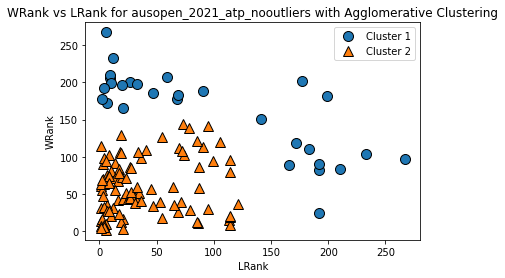

In [96]:
from sklearn.cluster import AgglomerativeClustering 

agg_ausopen_2021_atp = AgglomerativeClustering(n_clusters=2)
assignment_ausopen2021_atp = agg_ausopen_2021_atp.fit_predict(ausopen_2021_atp_WRankLRank_array)

mglearn.discrete_scatter(ausopen_2021_atp_WRankLRank_array[:, 0], ausopen_2021_atp_WRankLRank_array[:, 1], assignment_ausopen2021_atp)
plt.title('WRank vs LRank for ausopen_2021_atp_nooutliers with Agglomerative Clustering')
plt.legend(["Cluster 1", "Cluster 2"], loc="best")
plt.xlabel("LRank")
plt.ylabel("WRank")

In [97]:
from sklearn.metrics import silhouette_score
silhouette_score(ausopen_2021_atp_WRankLRank_array, assignment_ausopen2021_atp)

0.4837997590560462

Now for French Open:

Text(0, 0.5, 'WRank')

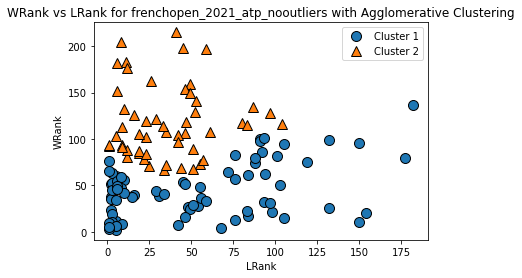

In [98]:
agg_frenchopen_2021_atp = AgglomerativeClustering(n_clusters=2)
assignment_frenchopen2021_atp = agg_frenchopen_2021_atp.fit_predict(frenchopen_2021_atp_WRankLRank_array)

mglearn.discrete_scatter(frenchopen_2021_atp_WRankLRank_array[:, 0], frenchopen_2021_atp_WRankLRank_array[:, 1], assignment_frenchopen2021_atp)
plt.title('WRank vs LRank for frenchopen_2021_atp_nooutliers with Agglomerative Clustering')
plt.legend(["Cluster 1", "Cluster 2"], loc="best")
plt.xlabel("LRank")
plt.ylabel("WRank")

In [99]:
silhouette_score(frenchopen_2021_atp_WRankLRank_array, assignment_frenchopen2021_atp)

0.30427162976226657

Here, we can see that unlike for Australian Open, the clusters are not divided more cleanly. Also, compared to GMM which gave the cluster below a very small size, now we have a sizeable cluster of blue points. Since the silhouette score is small, hence the model needs to be tuned if we are to get a silhouette score of 0.38 or higher, hence beating the benchmark set by k means. For this purpose, let's tune the `linkage` parameter - instead of choosing `ward`, let's pick `average`. If we pick an argument different from `ward` for `linkage`, this will allow us to vary the `affinity` parameter.

`affinity` is a metric used to compute the linkage. It can be `l1`, `l2`, `cosine` or `precomputed`. Let's use `l1` which corresponds to the taxicab (Manhattan) norm.

0.4208344674411413

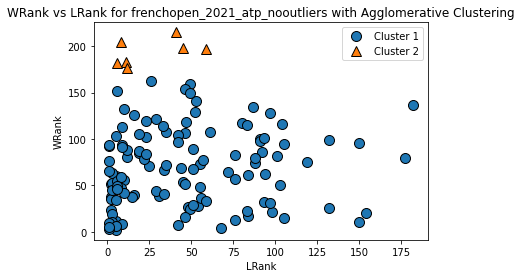

In [108]:
agg_frenchopen_2021_atp = AgglomerativeClustering(n_clusters=2, affinity = 'l1', linkage = 'average')
assignment_frenchopen2021_atp = agg_frenchopen_2021_atp.fit_predict(frenchopen_2021_atp_WRankLRank_array)

mglearn.discrete_scatter(frenchopen_2021_atp_WRankLRank_array[:, 0], frenchopen_2021_atp_WRankLRank_array[:, 1], assignment_frenchopen2021_atp)
plt.title('WRank vs LRank for frenchopen_2021_atp_nooutliers with Agglomerative Clustering')
plt.legend(["Cluster 1", "Cluster 2"], loc="best")
plt.xlabel("LRank")
plt.ylabel("WRank")
silhouette_score(frenchopen_2021_atp_WRankLRank_array, assignment_frenchopen2021_atp)

Note that whilst the benchmark for 0.38 has been crossed, it has come at the expense of having one extremely large cluster and an extremely small cluster (with just 7 datapoints). As a result, interpretability is greatly compromised.

Now for Wimbledon:

0.3689683371399733

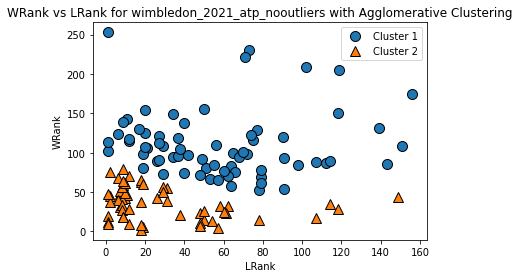

In [110]:
agg_wimbledon_2021_atp = AgglomerativeClustering(n_clusters=2)
assignment_wimbledon2021_atp = agg_wimbledon_2021_atp.fit_predict(wimbledon_2021_atp_WRankLRank_array)

mglearn.discrete_scatter(wimbledon_2021_atp_WRankLRank_array[:, 0], wimbledon_2021_atp_WRankLRank_array[:, 1], assignment_wimbledon2021_atp)
plt.title('WRank vs LRank for wimbledon_2021_atp_nooutliers with Agglomerative Clustering')
plt.legend(["Cluster 1", "Cluster 2"], loc="best")
plt.xlabel("LRank")
plt.ylabel("WRank")

silhouette_score(wimbledon_2021_atp_WRankLRank_array, assignment_wimbledon2021_atp)

The silhouette score is 0.369 (close to 0.383 - the figure for k means, and beats figures obtained for GMMs) but we want to strictly achieve the goal of beating k means in performance. Let's adopt the same parameter changes as done for French Open:

0.5549613230473407

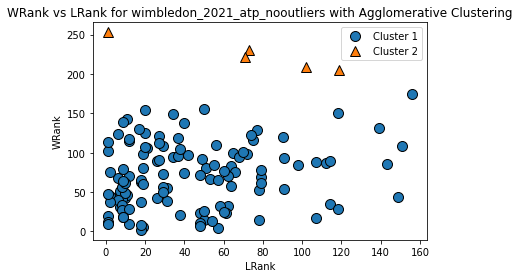

In [111]:
agg_wimbledon_2021_atp = AgglomerativeClustering(n_clusters=2, affinity = 'l1', linkage = 'average')
assignment_wimbledon2021_atp = agg_wimbledon_2021_atp.fit_predict(wimbledon_2021_atp_WRankLRank_array)

mglearn.discrete_scatter(wimbledon_2021_atp_WRankLRank_array[:, 0], wimbledon_2021_atp_WRankLRank_array[:, 1], assignment_wimbledon2021_atp)
plt.title('WRank vs LRank for wimbledon_2021_atp_nooutliers with Agglomerative Clustering')
plt.legend(["Cluster 1", "Cluster 2"], loc="best")
plt.xlabel("LRank")
plt.ylabel("WRank")

silhouette_score(wimbledon_2021_atp_WRankLRank_array, assignment_wimbledon2021_atp)

Note that whilst the benchmark for 0.38 has been crossed substantially, it has come at the expense of having one extremely large cluster and an extremely small cluster for large values for WRank like seen with French Open data (with just 5 datapoints). As a result, interpretability is greatly compromised.

Now for US Open:

0.31599499291342403

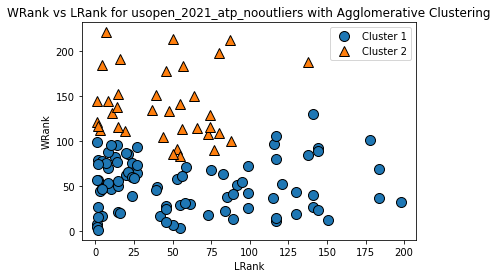

In [113]:
agg_usopen_2021_atp = AgglomerativeClustering(n_clusters=2)
assignment_usopen2021_atp = agg_usopen_2021_atp.fit_predict(usopen_2021_atp_WRankLRank_array)

mglearn.discrete_scatter(usopen_2021_atp_WRankLRank_array[:, 0], usopen_2021_atp_WRankLRank_array[:, 1], assignment_usopen2021_atp)
plt.title('WRank vs LRank for usopen_2021_atp_nooutliers with Agglomerative Clustering')
plt.legend(["Cluster 1", "Cluster 2"], loc="best")
plt.xlabel("LRank")
plt.ylabel("WRank")

silhouette_score(usopen_2021_atp_WRankLRank_array, assignment_usopen2021_atp)

Since the silhouette score is small, hence the model needs to be tuned if we are to get a silhouette score of 0.38 or higher, hence beating the benchmark set by k means.

0.4113599218519371

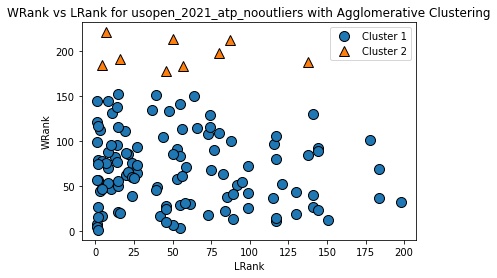

In [114]:
agg_usopen_2021_atp = AgglomerativeClustering(n_clusters=2, affinity = 'l1', linkage = 'average')
assignment_usopen2021_atp = agg_usopen_2021_atp.fit_predict(usopen_2021_atp_WRankLRank_array)

mglearn.discrete_scatter(usopen_2021_atp_WRankLRank_array[:, 0], usopen_2021_atp_WRankLRank_array[:, 1], assignment_usopen2021_atp)
plt.title('WRank vs LRank for usopen_2021_atp_nooutliers with Agglomerative Clustering')
plt.legend(["Cluster 1", "Cluster 2"], loc="best")
plt.xlabel("LRank")
plt.ylabel("WRank")

silhouette_score(usopen_2021_atp_WRankLRank_array, assignment_usopen2021_atp)

The silhouette score here is above the threshold set by k means, but lower than silhouette scores when the affinity and linkage were changed for other grand slams. However, here interpretability of the decision boundary can be better understood, as there are 9 data points evenly distributed across the x axis. So the classifier can be seen as matches where WRank > 160.

<u>Overall comment about agglomerative clustering and silhouette scores:</u> The silhouette score can be seen as an inverse measure of explainability of cluster formation and uniformity across clusters. The higher the score, the less uniform the clusters formed (with one cluster having more and more data points with rising score, until the score reaches a threshold after which no points can be assigned to another cluster).

<b>Conclusion:</b>

To recap, this notebook uses unsupervised learning methodologies for mining patterns between the ATP entry ranking of the winner of a match, and the ATP entry ranking of the loser of a match across all Grand Slam matches in the 2021 ATP season. We saw k-means clustering perform relatively better than Gaussian Mixture Models with respect to the quality of clusters created. As explained above, we have been able to get a higher silhouette score by the agglomerative clustering method. However, interpretability is compromised since first of all, the clusters are not divided cleanly with a meaningful relation. Secondly, in many instances one cluster with lots of data points and another cluster with barely any data points is formulated. This explains the interpretability-accuracy tradeoff that is frequently encountered when dealing with machine learning algorithms.

**Limitations:**

Like with the implementation of any set of machine learning algorithm/s, there are limitations associated with the implementation and results:

a. Restricting the number of unsupervised methods used to 3. This was however done due to time constraints.

b. No consideration of a proper train-validation-test set procedure. This is because the data is time series in nature, with a natural order in terms of datapoints starting from round 1 to the final. Hence, defining a test set, assuming the time series process is just 2021 data would not be feasible. This is because matches close to and including the final are similar to matches much before the final i.e. preliminary rounds. Secondly, unlike supervised learning where it is important to formally define the train-test procedure, it is generally not necessary to do train-test in unsupervised learning. A potential solution would be to train the unsupervised learning algorithms on $n$ years of Grand Slam data, then test the trained unsupervised learning on $x$ years of Grand Slam data where $n \leq x$. 

c. Using the silhouette score as a framework for measuring accuracy. Again, this was done for uniformity in analysis but a metric such as Dunn's Index could have also been used and compared with the silhouette coefficient.

d. Intuitively, we know that the following variables defined in the data, also impact the outcome of a match:
1. WRank: ATP Entry Rating of the match winner as of the start of the tournament
2. LRank: ATP Entry Rating of the match loser as of the start of the tournament
3. WPts: ATP Entry points of the match winner as of the start of the tournament
4. LPts: ATP Entry points of the match loser as of the start of the tournament
5. Wsets: Number of sets won by match winner
6. Lsets: Number of sets won by match loser

Point d will be looked at more closely in successive notebooks on tennis analytics.

**References:**

[1]: 

Unit 9 Tutorial - FOMLADS (INST0060: Foundations of Machine Learning and Data Science)

[2]: 

https://scikit-learn.org/stable/auto_examples/classification/plot_lda_qda.html#sphx-glr-auto-examples-classification-plot-lda-qda-py

[3]:

https://machinelearningmastery.com/clustering-algorithms-with-python/

[4]: 

Christopher M. Bishop, Pattern Recognition And Machine Learning, Springer-Verlag New York, 2006.

[5]: 

Introduction to Machine Learning with Python: A Guide for Data Scientists by Andreas C. Muller and Sarah Guido

[6]:

https://analyticsindiamag.com/gaussian-mixture-model-clustering-vs-k-means-which-one-to-choose/

[7]:

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

[8]:

https://towardsdatascience.com/gaussian-mixture-models-vs-k-means-which-one-to-choose-62f2736025f0#:~:text=The%20first%20visible%20difference%20between,GMs%20is%20a%20probabilistic%20algorithm.

[9]:

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

[10]:

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

[11]: 

http://tennis-data.co.uk/